<a href="https://colab.research.google.com/github/Pranesh-VM/Phishing_website_detection_CIP/blob/main/CIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset from GitHub
url = "https://raw.githubusercontent.com/Pranesh-VM/Phishing_website_detection_CIP/main/verified_online.csv"
df_phishing = pd.read_csv(url)
df_legitimate=pd.read_csv("phishing_site_urls.csv")


In [44]:
#preprocessing

# Extract relevant columns and standardize labels
phishing_urls = df_phishing[['url']].copy()
phishing_urls.rename(columns={'url': 'URL'}, inplace=True)
phishing_urls['Label'] = 'phishing'

#print("phishtank data:",len(phishing_urls.index))

# Process legitimate dataset (it contains 'good' and 'bad' labels)
df_legitimate.rename(columns={'URL': 'URL', 'Label': 'Label'}, inplace=True)
df_legitimate['Label'] = df_legitimate['Label'].map({'bad': 'phishing', 'good': 'legitimate'})

# Combine datasets
combined_df = pd.concat([phishing_urls, df_legitimate], ignore_index=True)
combined_df.drop_duplicates(subset=['URL'], inplace=True)

# Count phishing and legitimate URLs
# count_labels = combined_df['Label'].value_counts()

# print("Phishing URLs:", count_labels.get('phishing', 0))
# print("Legitimate URLs:", count_labels.get('legitimate', 0))


# Balance dataset (Ensure 1:1 ratio of phishing to legitimate URLs)
phishing_sample = combined_df[combined_df['Label'] == 'phishing']
legitimate_sample = combined_df[combined_df['Label'] == 'legitimate']

print("before unbalanced dataset:")

print("phishing samples:",len(phishing_sample))
print("legitimate samples:",len(legitimate_sample))
# Ensure equal number of phishing and legitimate URLs
min_count = min(len(phishing_sample), len(legitimate_sample))
phishing_sample = phishing_sample.sample(n=min_count, random_state=42)
legitimate_sample = legitimate_sample.sample(n=min_count, random_state=42)
print("after balancing")
print("Phishing samples:",len(phishing_sample))
print("legitmate samples:",len(legitimate_sample))
balanced_df = pd.concat([phishing_sample, legitimate_sample], ignore_index=True)

# Split dataset into Train (70%), Validation (20%), Test (10%)
train_df, temp_df = train_test_split(balanced_df, test_size=0.3, random_state=42, stratify=balanced_df['Label'])
val_df, test_df = train_test_split(temp_df, test_size=1/3, random_state=42, stratify=temp_df['Label'])

# Save preprocessed datasets
train_df.to_csv("train_set.csv", index=False)
val_df.to_csv("val_set.csv", index=False)
test_df.to_csv("test_set.csv", index=False)

print(f"Preprocessed and balanced dataset saved with training, validation, and test splits.")

# Display dataset info
display(train_df.info())
display(train_df.head())


before unbalanced dataset:
phishing samples: 177386
legitimate samples: 392897
after balancing
Phishing samples: 177386
legitmate samples: 177386
Preprocessed and balanced dataset saved with training, validation, and test splits.
<class 'pandas.core.frame.DataFrame'>
Index: 248340 entries, 26028 to 65020
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     248340 non-null  object
 1   Label   248340 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB


None

,URL,Label
26028,https://docs.google.com/presentation/d/e/2PACX...,phishing
260718,academon.com/Essay-Transcontinental-Railroad/2...,legitimate
147674,https://drive-secu.myportfolio.com/,phishing
196815,linkedin.com/pub/michael-o-neal/a/319/51b,legitimate
245062,judgepedia.org/index.php/Frederic_Smalkin,legitimate


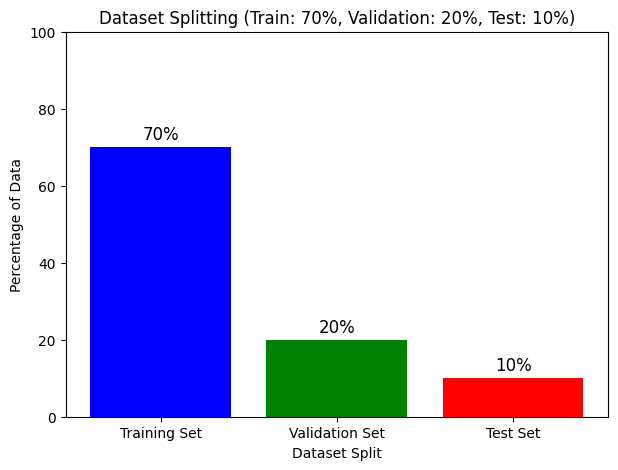

In [45]:
import matplotlib.pyplot as plt

# Dataset split percentages
split_labels = ['Training Set', 'Validation Set', 'Test Set']
split_sizes = [70, 20, 10]  # Percentages

# Create bar chart
plt.figure(figsize=(7, 5))
plt.bar(split_labels, split_sizes, color=['blue', 'green', 'red'])

# Labels and title
plt.xlabel("Dataset Split")
plt.ylabel("Percentage of Data")
plt.title("Dataset Splitting (Train: 70%, Validation: 20%, Test: 10%)")
plt.ylim(0, 100)

# Annotate bars with percentages
for i, v in enumerate(split_sizes):
    plt.text(i, v + 2, f"{v}%", ha='center', fontsize=12)

# Show the plot
plt.show()
